In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

levenberg optimization

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store import *


In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

In [8]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 6.00e-01, 5.18e+04
gammaDh  = 6.00e-01, 5.18e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
EOp  = 1.16e-06, 1.00e-01
EIp  = 0.00e+00, 0.00e+00
EOh  = 1.16e-06, 1.00e-01
EIh  = 0.00e+00, 0.00e+00
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 1.64e-05, 1.42e+00
VmaxINp  = 8.20e-05, 7.08e+00
VmaxOCp  = 1.28e-05, 1.11e+00
VmaxICp  = 6.40e-05, 5.53e+00
VmaxONh  = 1.50e-05, 1.30e+00
VmaxINh  = 1.50e-05, 1.30e+00
VmaxOCh  = 6.77e-05, 5.85e+00
VmaxICh  = 0.00e+00, 0.00e+00
Oh  = 1.00e+00, 8.64e+04
Op  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VmaxROSh  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
omegaP  = 1.00e-02, 8.64e+02
omegaH  = 1.00e-05, 8.64e-01
ROS_decay  = 1.16e-07, 1.00e-02
KABp  = 1.43e-01, 1.23

In [9]:
len(param_vals)

In [10]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [11]:
Qh * 14 * 1e9, Qp * 14 * 1e9, 

dBp/dt


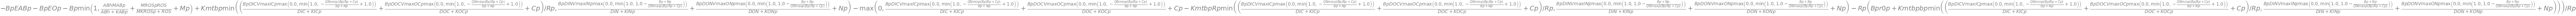

dBh/dt


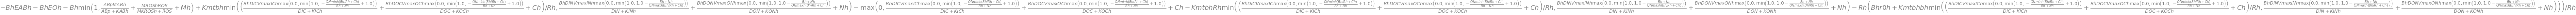

dDON/dt


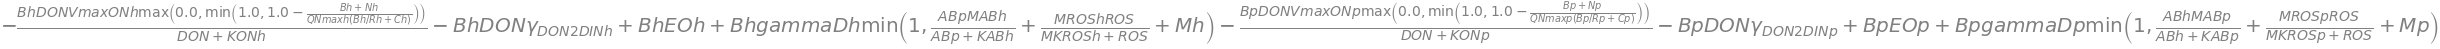

dRDON/dt


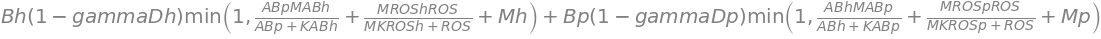

dDIN/dt


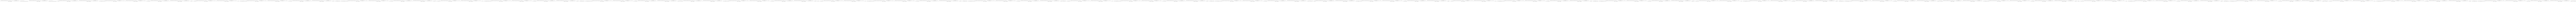

dDOC/dt


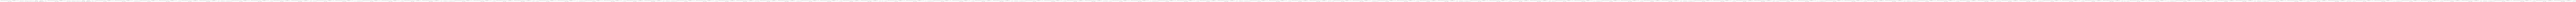

dRDOC/dt


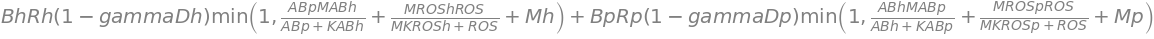

dDIC/dt


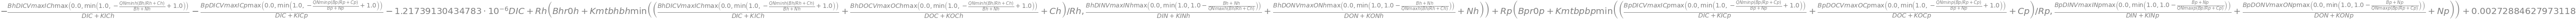

dROS/dt


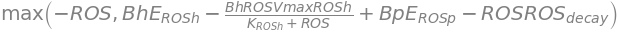

dABp/dt


dABh/dt


In [18]:
print_equations()


In [12]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data(param_vals, pro99_mode=False)

In [13]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = -1.98e-05, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 1.56e-05, init Np = 0.00e+00, newval = 1.56e-05
dCp/dt = 1.09e-04, init Cp = 0.00e+00, newval = 1.09e-04
dBh/dt = -4.28e-04, init Bh = 2.86e+01, newval = 2.86e+01
dNh/dt = 3.60e-04, init Nh = 0.00e+00, newval = 3.60e-04
dCh/dt = 1.62e-03, init Ch = 0.00e+00, newval = 1.62e-03
dDON/dt = -1.28e-05, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 1.49e-05, init RDON = 0.00e+00, newval = 1.49e-05
dDIN/dt = 7.03e-05, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = 8.57e-05, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 6.91e-05, init RDOC = 0.00e+00, newval = 6.91e-05
dDIC/dt = 1.81e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = -8.50e-05, init ROS = 2.00e-01, newval = 2.00e-01
dABp/dt = 1.16e-16, init ABp = 0.00e+00, newval = 1.16e-16
dABh/dt = 1.16e-15, init ABh = 0.00e+00, newval = 1.16e-15


In [53]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
Xh   = 5.00e+09
limINp = 9.99e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.98e-01
gross_uptakeINp = 1.46e-04
gross_uptakeONp = 2.90e-05
gross_uptakeICp = 1.14e-04
gross_uptakeOCp = 2.28e-05
gross_uptakeINh = 2.14e-04
gross_uptakeONh = 2.12e-04
gross_uptakeICh = 0.00e+00
gross_uptakeOCh = 9.65e-04
net_uptakeNp = 1.95e-05
net_uptakeNh = 2.15e-04
overflowNp = 1.55e-04
overflowCp = -2.71e-20
overflowNh = 2.12e-04
overflowCh = -6.51e-19
deathp = 2.07e-06
deathh = 1.65e-05
leakinessOp = 2.07e-06
leakinessIp = 0.00e+00
leakinessOh = 1.65e-05
leakinessIh = 0.00e+00
ROSreleasep = 1.16e-06
ROSbreakdownh = 4.88e-05
respirationp = 3.92e-06
respirationh = 3.19e-05
dic_air_water_exchange = -9.11e-18


In [15]:
biomass_diff0(calc_dydt, var_names,init_vars)


dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -1.2731515060954157e-15


In [16]:
init_vars

In [17]:
get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t'])


array([       0.,    14400.,    28800.,    43200.,    57600.,    72000.,
          86400.,   100800.,   115200.,   129600.,   144000.,   157320.,
         158400.,   172800.,   187200.,   201600.,   216000.,   230400.,
         244800.,   259200.,   273600.,   288000.,   302400.,   316800.,
         331200.,   345600.,   360000.,   374400.,   388800.,   403200.,
         417540.,   417600.,   432000.,   446400.,   460800.,   475200.,
         489600.,   504000.,   518400.,   532800.,   547200.,   561600.,
         576000.,   590400.,   592140.,   604800.,   619200.,   633600.,
         648000.,   662400.,   676800.,   691200.,   705600.,   720000.,
         734400.,   748800.,   758520.,   763200.,   777600.,   792000.,
         806400.,   820800.,   835200.,   849600.,   864000.,   878400.,
         892800.,   907200.,   921600.,   936000.,   950400.,   964800.,
         979200.,   993600.,  1008000.,  1019820.,  1022400.,  1036800.,
        1051200.,  1065600.,  1080000.,  1094400., 

In [60]:
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 2.738443234999991


In [62]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func, param_vals)

ValueError: too many values to unpack (expected 2)

In [ ]:
def _rmse(refdf, df, refcol, col):
    smallrefdf = refdf.dropna(subset=[refcol])
    ref_t = np.rint(smallrefdf['t'])
    tdf = df.loc[df.t.isin(ref_t)]
    return mean_squared_error(tdf[col], smallrefdf[refcol])
   

In [ ]:
perr =  _rmse(refdf, df, refcol = 'cc Bp[N]', col='Bp')
herr =  _rmse(refdf, df, refcol = 'cc Bh[N]', col='Bh')
terr =  _rmse(refdf, df, refcol = 't', col='t')
terr, perr, herr, perr+herr


In [ ]:
refdf

In [ ]:
#df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [ ]:
df.head()

In [ ]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [ ]:
refdf.columns

In [ ]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)


In [ ]:
df.columns

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
df[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


In [ ]:
sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)

In [ ]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='1A3')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))

plt.show()
sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
plt.legend()
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


In [ ]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='cc mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='cc 1A3')

sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right', bbox_to_anchor=(1.6,0))
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


In [ ]:
len(param_vals)

In [ ]:
df.min()

In [ ]:
refdf.nsmallest(10, columns='cc mit9312')

In [ ]:
refdf.head()

In [ ]:
dir(sol)

In [ ]:
sol.status

In [ ]:
sol.nfev, sol.njev, sol.nlu

In [ ]:
sol.message

In [ ]:
refdf

In [ ]:
refdf.columns

In [ ]:
param_vals

In [ ]:
param_vals_neutral

In [ ]:
param_df = pd.DataFrame( [param_vals, param_vals_neutral], index=['val', 'neutral']).T
param_df['diff'] = param_df['val'] - param_df['neutral'] 

In [ ]:
param_df.loc[param_df['diff'] != 0.0]

In [ ]:
 0.7 * 1.9e-9 / Qp 

In [ ]:
2 * 1.9e-9 / Qh 